# House prediction analysis
Predicting house prices ties directly to real estate, economics, and business decisions.

The features listed are standard variables from this dataset:
* CRIM: Per capita crime rate by town.
* ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: Proportion of non-retail business acres per town.
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
* NOX: Nitric oxides concentration (parts per 10 million).
* RM: Average number of rooms per dwelling.
* AGE: Proportion of owner-occupied units built prior to 1940.
* DIS: Weighted distances to five Boston employment centers.
* RAD: Index of accessibility to radial highways.
* TAX: Full-value property-tax rate per $10,000.
* PTRATIO: Pupil-teacher ratio by town.
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of Black people by town.
* LSTAT: % lower status of the population.
* MEDV: Median value of owner-occupied homes in $1000s. (This is the target variable)

### Import libraries 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


### Loading the dataset

In [23]:
# Define column names based on Boston Housing dataset
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

# Load data
df = pd.read_csv('/home/user/Downloads/house Prediction Data Set.csv', delim_whitespace=True, names=columns)


In [31]:
# Display the first 10 rows of the dataframe
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [32]:
# Display the column names of the dataframe
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [33]:
# Display the info of the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [34]:
# Display the statistical summary of the dataframe
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [35]:
# Drop duplicate rows from the dataframe
df.drop_duplicates(inplace=True)

### Data exploration

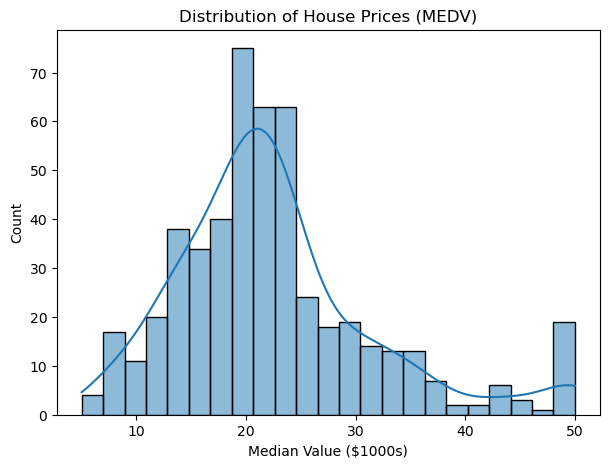

In [37]:
# Plot the distribution of the target variable 'MEDV'
plt.figure(figsize=(7,5))
sns.histplot(df['MEDV'], kde=True)
plt.title('Distribution of House Prices (MEDV)')
plt.xlabel('Median Value ($1000s)')
plt.show()

In [39]:
# the data distribution of the house prices is right-skewed, indicating that 
# there are more lower-priced houses than higher-priced ones.

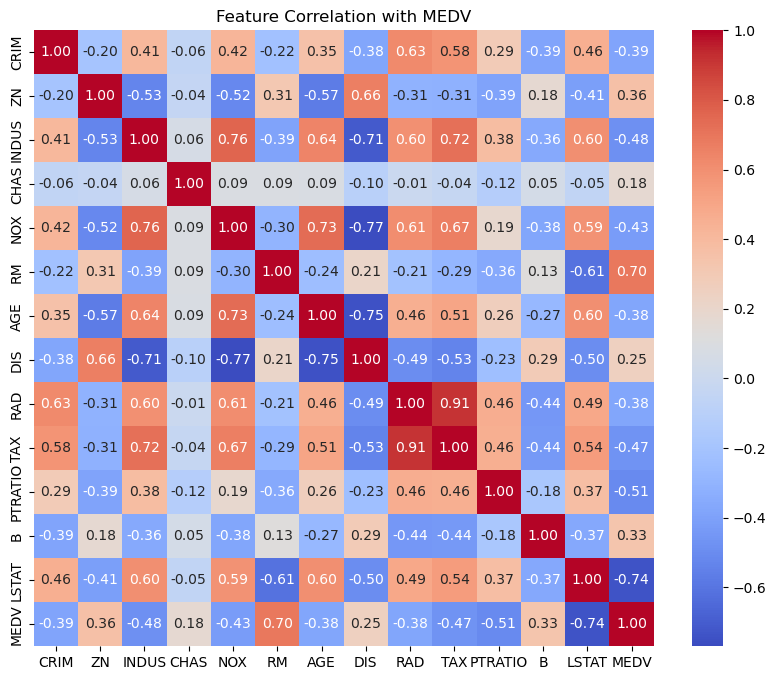

In [40]:
#correlation heatmap
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation with MEDV')
plt.show()

In [42]:
# Strongest Positive Correlation: RM (Average number of rooms) has a correlation of 0.70 with MEDV. This makes intuitive sense: 
# houses with more rooms tend to be more valuable. Strongest Negative Correlation: LSTAT (% lower status of the population) has a
# correlation of -0.74 with MEDV. This also makes sense: areas with a higher percentage of lower-status residents tend to have lower 
# home values. PTRATIO (Pupil-teacher ratio) is negatively correlated (-0.51), suggesting schools with fewer students per teacher are 
# in more expensive areas.DIS (Distance to employment centers) is negatively correlated (-0.43), meaning homes closer to work are
# generally more expensive.RAD (Accessibility to highways) is positively correlated (0.46), indicating better highway access can 
# increase value. NOX and INDUS are strongly positively correlated (0.76), which is logical as industrial areas often have higher 
# pollution.TAX and PTRATIO are also positively correlated (0.91), suggesting towns with higher taxes might also have higher
# pupil-teacher ratios.

In [43]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [44]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear regression

In [45]:
# Initialize and train
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
# Predict
y_pred_lr = lr.predict(X_test)

In [47]:
# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [48]:
print(f"Linear Regression Results:")
print(f"R²: {r2_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")

Linear Regression Results:
R²: 0.6688
RMSE: 4.9286


In [ ]:
# The R2 value of 0.6688 indicates that approximately 66.88% of the variance in house prices can be explained by the features used 
# in the model.
# RMSE of 4.9286 means that, on average, the model's predictions are off by about $4,928.60.

### Random Forest classifier

In [ ]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [52]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [53]:
print(f"\nRandom Forest Results:")
print(f"R²: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")


Random Forest Results:
R²: 0.8923
RMSE: 2.8110


In [54]:
# The results from the random forest: R2 of 0.8923 indicate that about 89.23% of the variance in house prices is explained by the model.
# RMSE of 2.8110 indicate that on average the modesl's predictions are off by about $2,811.00. And the random forest model is outperforming
# the linear regression model significantly in both R2 and RMSE metrics.